# Here we are going to use Fastai to classify skin lesion. 

### For now let's rely only on the images for classification. 

### Let's start with basic imports.

In [ ]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [ ]:
!pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 7.4 MB/s 
     |████████████████████████████████| 48.3 MB 109 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.6 MB/s 


In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.9 MB/s 


In [ ]:
from glob import glob
import os

from xml.dom import minidom

import pandas as pd
import numpy

import platform
import patoolib
import shutil
import xml.etree.ElementTree as ET
from tqdm.notebook import tqdm
import albumentations as A
print(platform.python_version())
import cv2
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

ModuleNotFoundError: ignored

In [ ]:
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

if os.getcwd()=="/content/yolov5":
  %cd ..
  print("Set path to content")
print(os.getcwd())
paths = {
    'ANNOTATION_PATH': os.path.join(os.getcwd(),'Tensorflow', 'workspace','annotations_skin'),
    'IMAGE_PATH': os.path.join(os.getcwd(),'Tensorflow', 'workspace','images_skin'),
    'Drive_IMAGE_PATH': os.path.join(os.getcwd(),"/content/drive/MyDrive", 'workspace','images_skin'),
    'Drive_Model_PATH': os.path.join(os.getcwd(),"/content/drive/MyDrive", 'workspace','yolo_skin'),
    'Drive_Main_Archive_PATH': os.path.join(os.getcwd(),"/content/drive/MyDrive", 'dataset-skin'),
 }
paths['Drive_Model_PATH']
paths['IMAGE_PATH']

/content


'/content/Tensorflow/workspace/images_skin'

In [ ]:

USEDriveToStoreTfRecords=False
#force reupload
NewDataSet=False


#archiveFileName='500_archive.tar.gz'
archiveFileName='skin-cancer-mnist-ham10000.zip'
#archiveFileName='CleanedDataSet_hyper.rar'
delete=[paths["ANNOTATION_PATH"],paths["IMAGE_PATH"]]
if NewDataSet:
  print("will delete")
  for path in delete:
    print("trying delete")
    if os.path.exists(path):
      print("deleted ",path)
      if os.name == 'posix':
        !rm -rf {path}
      if os.name == 'nt':
        !rm -rf {path}

for path in paths.values():
  if not os.path.exists(path):
    if os.name == 'posix':
      !mkdir -p {path}
    if os.name == 'nt':
      !mkdir {path}

ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'],archiveFileName )
ARCHIVE_FILES_drive = os.path.join(paths['Drive_Main_Archive_PATH'], archiveFileName)

if IN_COLAB and USEDriveToStoreTfRecords:
  TFrecordsTrainPath=os.path.join(paths['Drive_IMAGE_PATH'], 'train.record')
  TFrecordsTestPath=os.path.join(paths['Drive_IMAGE_PATH'], 'test.record')
else:
  TFrecordsTrainPath=os.path.join(paths['IMAGE_PATH'], 'train.record')
  TFrecordsTestPath=os.path.join(paths['IMAGE_PATH'], 'test.record')

trainFolder=os.path.join(paths['IMAGE_PATH'], 'train')
testFolder=os.path.join(paths['IMAGE_PATH'], 'test')
if IN_COLAB:
  print("FOR IMAGES: please add your images seprated to test and train folders in ",paths['Drive_IMAGE_PATH'])
  print(f"FOR ARCHIVE: if there is an archive counting the train and test folders and in '.tar.gz' format add it to {paths['Drive_IMAGE_PATH']} and make the name as {archiveFileName}")
else:
  print("FOR IMAGES: please add your images seprated to test and train folders in ",paths['IMAGE_PATH'])
  print(f"FOR ARCHIVE: if there is an archive counting the train and test folders and in .tar.gz format add it to {paths['IMAGE_PATH']} and make the name as {archiveFileName}")

FOR IMAGES: please add your images seprated to test and train folders in  /content/drive/MyDrive/workspace/images_skin
FOR ARCHIVE: if there is an archive counting the train and test folders and in '.tar.gz' format add it to /content/drive/MyDrive/workspace/images_skin and make the name as skin-cancer-mnist-ham10000.zip


In [ ]:
import shutil

#!wget -O {ARCHIVE_FILES} https://storage.googleapis.com/anime-293309.appspot.com/archive.tar.gz
if not os.path.exists(TFrecordsTrainPath) or not os.path.exists(TFrecordsTestPath) or NewDataSet:
  if not os.path.exists(trainFolder) or not os.path.exists(testFolder):
    if os.path.exists(ARCHIVE_FILES):
      try:
        patoolib.extract_archive(ARCHIVE_FILES, outdir= paths['IMAGE_PATH'])
      except:
        if IN_COLAB:
          os.remove(ARCHIVE_FILES)
          shutil.copy(ARCHIVE_FILES_drive, ARCHIVE_FILES)
          patoolib.extract_archive(ARCHIVE_FILES, outdir= paths['IMAGE_PATH'])
      #shutil.unpack_archive(ARCHIVE_FILES, paths['IMAGE_PATH'])
    elif IN_COLAB:
      print(ARCHIVE_FILES_drive)
      if os.path.exists(ARCHIVE_FILES_drive):
        if not os.path.exists(ARCHIVE_FILES):
          shutil.copy(ARCHIVE_FILES_drive, ARCHIVE_FILES)
        
        patoolib.extract_archive(ARCHIVE_FILES, outdir= paths['IMAGE_PATH'])
        #shutil.unpack_archive(ARCHIVE_FILES, paths['IMAGE_PATH'])
        #!tar -zxvf {ARCHIVE_FILES} -C {paths['IMAGE_PATH']}
      else:
        raise ValueError("Archive is not found")

else:
  print("tf records are in needed location ")

/content/drive/MyDrive/dataset-skin/skin-cancer-mnist-ham10000.zip
patool: Extracting /content/Tensorflow/workspace/images_skin/skin-cancer-mnist-ham10000.zip ...
patool: running /usr/bin/7z x -o/content/Tensorflow/workspace/images_skin -- /content/Tensorflow/workspace/images_skin/skin-cancer-mnist-ham10000.zip
patool: ... /content/Tensorflow/workspace/images_skin/skin-cancer-mnist-ham10000.zip extracted to `/content/Tensorflow/workspace/images_skin'.


### Read in metadata.

In [ ]:
csv_path = "/content/Tensorflow/workspace/images_skin/HAM10000_metadata.csv"
skin_df = pd.read_csv(csv_path)
skin_df.sort_values(by="image_id")

,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk


### Translate shortcuts of diseases to english.

In [ ]:
short_to_full_name_dict = {
    "akiec" : "Bowen's disease", # very early form of skin cancer 
    "bcc" : "basal cell carcinoma" , # basal-cell cancer or white skin cancer
    "bkl" : "benign keratosis-like lesions", # non-cancerous skin tumour
    "df" : "dermatofibroma", # non-cancerous rounded bumps 
    "mel" : "melanoma", # black skin cancer
    "nv" : "melanocytic nevi", # mole non-cancerous
    "vasc" : "vascular lesions", # skin condition
}

### Let's create a dictionary, mapping each image id to a disease.

In [ ]:
img_to_class_dict = skin_df.loc[:, ["image_id", "dx"]] # returns only dx and image id column
img_to_class_dict = img_to_class_dict.to_dict('list')  # returns columns as lists in a dict
img_to_class_dict = {img_id : short_to_full_name_dict[disease] for img_id,disease in zip(img_to_class_dict['image_id'], img_to_class_dict['dx']) } # returns a dict mapping image id to disease name
[x for x in img_to_class_dict.items()][:5]
print(img_to_class_dict)

{'ISIC_0027419': 'benign keratosis-like lesions', 'ISIC_0025030': 'benign keratosis-like lesions', 'ISIC_0026769': 'benign keratosis-like lesions', 'ISIC_0025661': 'benign keratosis-like lesions', 'ISIC_0031633': 'benign keratosis-like lesions', 'ISIC_0027850': 'benign keratosis-like lesions', 'ISIC_0029176': 'benign keratosis-like lesions', 'ISIC_0029068': 'benign keratosis-like lesions', 'ISIC_0025837': 'benign keratosis-like lesions', 'ISIC_0025209': 'benign keratosis-like lesions', 'ISIC_0025276': 'benign keratosis-like lesions', 'ISIC_0029396': 'benign keratosis-like lesions', 'ISIC_0025984': 'benign keratosis-like lesions', 'ISIC_0025767': 'benign keratosis-like lesions', 'ISIC_0032417': 'benign keratosis-like lesions', 'ISIC_0031326': 'benign keratosis-like lesions', 'ISIC_0025915': 'benign keratosis-like lesions', 'ISIC_0031029': 'benign keratosis-like lesions', 'ISIC_0029836': 'benign keratosis-like lesions', 'ISIC_0032129': 'benign keratosis-like lesions', 'ISIC_0032343': 'be

In [ ]:
X=[]
y=[]
countNV=0
for key in img_to_class_dict:
  if img_to_class_dict[key] == 'melanocytic nevi':
    if countNV <1200:
      X.append(key)
      y.append(img_to_class_dict[key])
      countNV=countNV+1
  elif img_to_class_dict[key] == 'dermatofibroma':
    pass
    #X.append(key)
    #y.append(img_to_class_dict[key]) 
  else:
    X.append(key)
    y.append(img_to_class_dict[key])
print(X)
print(y)

['ISIC_0027419', 'ISIC_0025030', 'ISIC_0026769', 'ISIC_0025661', 'ISIC_0031633', 'ISIC_0027850', 'ISIC_0029176', 'ISIC_0029068', 'ISIC_0025837', 'ISIC_0025209', 'ISIC_0025276', 'ISIC_0029396', 'ISIC_0025984', 'ISIC_0025767', 'ISIC_0032417', 'ISIC_0031326', 'ISIC_0025915', 'ISIC_0031029', 'ISIC_0029836', 'ISIC_0032129', 'ISIC_0032343', 'ISIC_0025033', 'ISIC_0027310', 'ISIC_0032128', 'ISIC_0025937', 'ISIC_0027828', 'ISIC_0029291', 'ISIC_0030698', 'ISIC_0025567', 'ISIC_0031753', 'ISIC_0026835', 'ISIC_0031159', 'ISIC_0031017', 'ISIC_0024981', 'ISIC_0027815', 'ISIC_0024324', 'ISIC_0029559', 'ISIC_0030661', 'ISIC_0027053', 'ISIC_0028560', 'ISIC_0031650', 'ISIC_0029161', 'ISIC_0026273', 'ISIC_0025076', 'ISIC_0029687', 'ISIC_0025642', 'ISIC_0025819', 'ISIC_0032013', 'ISIC_0031691', 'ISIC_0025419', 'ISIC_0030105', 'ISIC_0025016', 'ISIC_0029147', 'ISIC_0029301', 'ISIC_0026637', 'ISIC_0030377', 'ISIC_0027960', 'ISIC_0026955', 'ISIC_0028052', 'ISIC_0025286', 'ISIC_0031468', 'ISIC_0030926', 'ISIC_0

In [ ]:
import numpy as np    
unique_labels, unique_counts = np.unique(y, return_counts=True)
labels_histogram = dict(zip(unique_labels, unique_counts))
labels_histogram

{"Bowen's disease": 327,
 'basal cell carcinoma': 514,
 'benign keratosis-like lesions': 1099,
 'melanocytic nevi': 1200,
 'melanoma': 1113,
 'vascular lesions': 142}

### Create a function for getting the label.
### Create a Datablock and specify Data Augmentation and 70/30 train/validation split.
### Then create the dataloader itself that gets passed to the model/learner.

In [ ]:
from sklearn.model_selection import train_test_split





X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.20,random_state=42)
print("X_train")
print(X_train)
print("X_test")
print(X_test)

print("y_train")
print(y_train)
print(len(y_train))
a = numpy.array(y_train)
unique, counts = numpy.unique(a, return_counts=True)
print(dict(zip(unique, counts)))

print("y_test")
print(y_test)
a = numpy.array(y_test)
unique, counts = numpy.unique(a, return_counts=True)
print(dict(zip(unique, counts)))


X_train
['ISIC_0026731', 'ISIC_0027888', 'ISIC_0024756', 'ISIC_0033529', 'ISIC_0032232', 'ISIC_0026255', 'ISIC_0026524', 'ISIC_0034070', 'ISIC_0026292', 'ISIC_0025090', 'ISIC_0027525', 'ISIC_0031652', 'ISIC_0032173', 'ISIC_0028282', 'ISIC_0026470', 'ISIC_0028690', 'ISIC_0032726', 'ISIC_0025894', 'ISIC_0025143', 'ISIC_0033230', 'ISIC_0031237', 'ISIC_0030335', 'ISIC_0029742', 'ISIC_0029770', 'ISIC_0031702', 'ISIC_0033779', 'ISIC_0026651', 'ISIC_0024656', 'ISIC_0026689', 'ISIC_0031406', 'ISIC_0030521', 'ISIC_0025180', 'ISIC_0027375', 'ISIC_0031996', 'ISIC_0032335', 'ISIC_0025130', 'ISIC_0031233', 'ISIC_0026015', 'ISIC_0032684', 'ISIC_0027776', 'ISIC_0031436', 'ISIC_0030403', 'ISIC_0030991', 'ISIC_0032517', 'ISIC_0025351', 'ISIC_0030660', 'ISIC_0025806', 'ISIC_0026769', 'ISIC_0033124', 'ISIC_0033151', 'ISIC_0031908', 'ISIC_0026832', 'ISIC_0024459', 'ISIC_0028158', 'ISIC_0029056', 'ISIC_0027256', 'ISIC_0024426', 'ISIC_0031823', 'ISIC_0029288', 'ISIC_0025437', 'ISIC_0025709', 'ISIC_0033486',

In [ ]:
path='/content/datasets'
if os.path.exists(path):
  print("deleted ",path)
  if os.name == 'posix':
    !rm -rf {path}
  if os.name == 'nt':
    !rm -rf {path}

In [ ]:
from google.colab.patches import cv2_imshow
#count=0
#/content/datasets/train
base_skin_dir = os.path.join('/content/Tensorflow/workspace/images_skin')
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}
print(imageid_path_dict)
trainFolder='/content/datasets/skin/train'
testFolder='/content/datasets/skin/test'

def extractImagesToNeededDirectory(train):
  if train==True:
    dis=trainFolder
    list_of_files=list(zip(X_train,y_train))
  else:
    dis=testFolder
    list_of_files=list(zip(X_test,y_test))
 
  
  for index in tqdm(range(len(list_of_files))):
    fileName=list_of_files[index][0]
    fileName=fileName+".jpg"
    label=list_of_files[index][1]
    dicOfLabel=os.path.join(dis,label)
    #print(dicOfLabel)
    if not os.path.exists(dicOfLabel):
      print(dicOfLabel)
      os.makedirs(dicOfLabel)

    dicOfImage=os.path.join(dis,label,fileName)
    shutil.copy(os.path.join(imageid_path_dict[os.path.splitext(fileName)[0]]),dicOfLabel)



extractImagesToNeededDirectory(True)
extractImagesToNeededDirectory(False)

{'ISIC_0026650': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0026650.jpg', 'ISIC_0028411': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0028411.jpg', 'ISIC_0029004': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0029004.jpg', 'ISIC_0025732': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0025732.jpg', 'ISIC_0025231': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0025231.jpg', 'ISIC_0027580': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0027580.jpg', 'ISIC_0028687': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0028687.jpg', 'ISIC_0026524': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0026524.jpg', 'ISIC_0027006': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_0027006.jpg', 'ISIC_0024992': '/content/Tensorflow/workspace/images_skin/HAM10000_images_part_1/ISIC_002

  0%|          | 0/3516 [00:00<?, ?it/s]

/content/datasets/skin/train/melanocytic nevi
/content/datasets/skin/train/vascular lesions
/content/datasets/skin/train/melanoma
/content/datasets/skin/train/benign keratosis-like lesions
/content/datasets/skin/train/basal cell carcinoma
/content/datasets/skin/train/Bowen's disease


  0%|          | 0/879 [00:00<?, ?it/s]

/content/datasets/skin/test/melanocytic nevi
/content/datasets/skin/test/melanoma
/content/datasets/skin/test/basal cell carcinoma
/content/datasets/skin/test/vascular lesions
/content/datasets/skin/test/Bowen's disease
/content/datasets/skin/test/benign keratosis-like lesions


### Create learner with ResNet18 (pretrained), and specify optimizer as ranger.
### Transfer learning with Mix up for 33 epochs.

Mix up is a very powerful technique that lets two images overlap and the corresponding one hot encoded label is no longer e.g. (0,0,0,1) it may be (0,0,0.5,0.5). 
So maybe 50% cat and 50 % dog. 

This is one of the most effective data augmentation techniques that is very good in stopping overfitting, but typically requires a lot of epochs to be worth it.
Especially for small datasets and top tier results mix up can be very helpful.

In [ ]:
# Setup
#if os.getcwd()=="/content/yolov5":
#  %cd ..
if os.getcwd()!="/content/yolov5":
  !git clone https://github.com/ultralytics/yolov5 -b classifier  # clone
if os.getcwd()=="/content":
  %cd yolov5

%pip install -qr requirements.txt  # install



Cloning into 'yolov5'...
remote: Enumerating objects: 12192, done.
remote: Total 12192 (delta 0), reused 0 (delta 0), pack-reused 12192
Receiving objects: 100% (12192/12192), 11.96 MiB | 9.05 MiB/s, done.
Resolving deltas: 100% (8441/8441), done.
/content/yolov5
     |████████████████████████████████| 596 kB 7.4 MB/s 


In [ ]:
imgSize=512
#model="yolov5s"
#model="yolov5m"
model="yolov5x"

#project=paths['Drive_Model_PATH']+"_v4_"+model
#project=paths['Drive_Model_PATH']+"_v5_"+model
project=paths['Drive_Model_PATH']+"_v88_"+model
#archiveFileName="CleanedDataSet2"
name=os.path.splitext(os.path.splitext(archiveFileName)[0])[0]
#name="skin-cancer-mnist-ham100002"
  #!python train.py --img {imgSize} --batch -1 --epochs 9999 --data dataset.yaml --weights {model} --project {project} --name {name} --patience 20 --hyp {os.path.join("/content/yolov5/data","hyperParamettera.yaml")}
already_trained_Path=os.path.join(project,name)
last=os.path.join(already_trained_Path,"weights","last.pt")
best=os.path.join(already_trained_Path,"weights","best.pt")
print(best)

#ham1000022

/content/drive/MyDrive/workspace/yolo_skin_v88_yolov5x/skin-cancer-mnist-ham10000/weights/best.pt


In [ ]:
# Train
!python classifier.py --model {model}  --data skin --epochs 10000 --optimizer AdamW --img {imgSize} --batch-size 16 --project {project} --name {name} 
# train from known point
#!python classifier.py --model {model} --weights {best} --data skin --epochs 10000 --optimizer AdamW --img {imgSize} --batch-size 16 --project {project} --name {name} 

github: ⚠️ YOLOv5 is out of date by 72 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-270-g152d964 torch 1.11.0+cu113 CPU

Training yolov5x on skin dataset with 6 classes...
classifier.py:274: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig(f, dpi=300, bbox_inches='tight')
imshow: examples saved to /content/drive/MyDrive/workspace/yolo_skin_v88_yolov5x/skin-cancer-mnist-ham100002/train_images.jpg
Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v6.1-270-g152d964 torch 1.11.0+cu113 CPU

Traceback (most recent call last):
  File "/root/.cache/torch/hub/ultralytics_yolov5_master/hubconf.py", line 47, in _create
    model = DetectMultiBackend(path, device=device)  # download/load FP32 model
  File "/content/yolov5/models/common.py", line 298, in __init__
    pt, jit, onnx, xml, e

In [ ]:

imgSize=512
#model="yolov5s"
#model="yolov5m"
model="yolov5x"

#project=paths['Drive_Model_PATH']+"_v4_"+model
#project=paths['Drive_Model_PATH']+"_v5_"+model
project=paths['Drive_Model_PATH']+"_v88_"+model
#archiveFileName="CleanedDataSet2"
name=os.path.splitext(os.path.splitext(archiveFileName)[0])[0]
#name="skin-cancer-mnist-ham100002"
  #!python train.py --img {imgSize} --batch -1 --epochs 9999 --data dataset.yaml --weights {model} --project {project} --name {name} --patience 20 --hyp {os.path.join("/content/yolov5/data","hyperParamettera.yaml")}
already_trained_Path=os.path.join(project,name)
last=os.path.join(already_trained_Path,"weights","last.pt")
best=os.path.join(already_trained_Path,"weights","best.pt")
print(best)



/content/drive/MyDrive/workspace/yolo_skin_v88_yolov5x/skin-cancer-mnist-ham10000/weights/best.pt


In [ ]:
# Inference
import torch
from classifier import *
from sklearn.metrics import confusion_matrix
from sklearn import metrics
resize = torch.nn.Upsample(size=(imgSize, imgSize), mode='bilinear', align_corners=False)  # image resize
device = select_device('', )

model = torch.load(best, map_location=torch.device(device))['model'].float()
# Transforms
trainform = T.Compose([
    T.RandomGrayscale(p=0.01),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomAffine(degrees=1, translate=(.2, .2), scale=(1 / 1.5, 1.5), shear=(-1, 1, -1, 1), fill=(114, 114, 114)),
    # T.Resize([imgsz, imgsz]),  # very slow
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))
    ])  # PILImage from [0, 1] to [-1, 1]
testform = T.Compose(trainform.transforms[-2:])

#files = Path("").glob('content/datasets/skin/test/*/*.jpg')  # images from dir
testset = torchvision.datasets.ImageFolder(root='/content/datasets/skin/test', transform=testform)
testloader = torch.utils.data.DataLoader(testset, shuffle=True)
names = testset.classes
print(list(names))


def test(model, dataloader, names):
    model.eval()
    pred, targets, loss = [], [], 0
    print("Reading images")
    inputData=list(dataloader)
    with torch.no_grad():
        for images, labels in tqdm(inputData):
            images, labels = resize(images.to(device)), labels.to(device)
            y = model(images)
            pred.append(torch.max(y, 1)[1])
            targets.append(labels)


    pred, targets = torch.cat(pred), torch.cat(targets)
    correct = (targets == pred).float()

    accuracy = correct.mean().item()

    print(f"{'class':30s}{'number':10s}{'accuracy':10s}")
    print(f"{'all':30s}{correct.shape[0]:10g}{accuracy:10.5g}")
    for i, c in enumerate(names):
        t = correct[targets == i]
        print(f"{c:30s}{t.shape[0]:10g}{t.mean().item():10.5g}")

    return (accuracy,targets.cpu(),pred.cpu())
acc,targets,pred=test(model,testloader,testset.classes)



YOLOv5 🚀 v6.1-270-g152d964 torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)



["Bowen's disease", 'basal cell carcinoma', 'benign keratosis-like lesions', 'melanocytic nevi', 'melanoma', 'vascular lesions']
Reading images


100%|██████████| 879/879 [00:11<00:00, 74.57it/s]


class                         number    accuracy  
all                                  879   0.88737
Bowen's disease                       65   0.76923
basal cell carcinoma                 103   0.91262
benign keratosis-like lesions        220   0.82273
melanocytic nevi                     240     0.975
melanoma                             223   0.88789
vascular lesions                      28   0.82143


In [ ]:
confusion_matrix(targets, pred)


array([[ 50,   4,   7,   0,   4,   0],
       [  0,  94,   8,   0,   1,   0],
       [  5,   4, 181,   3,  27,   0],
       [  0,   0,   5, 234,   1,   0],
       [  1,   7,  13,   4, 198,   0],
       [  0,   5,   0,   0,   0,  23]])

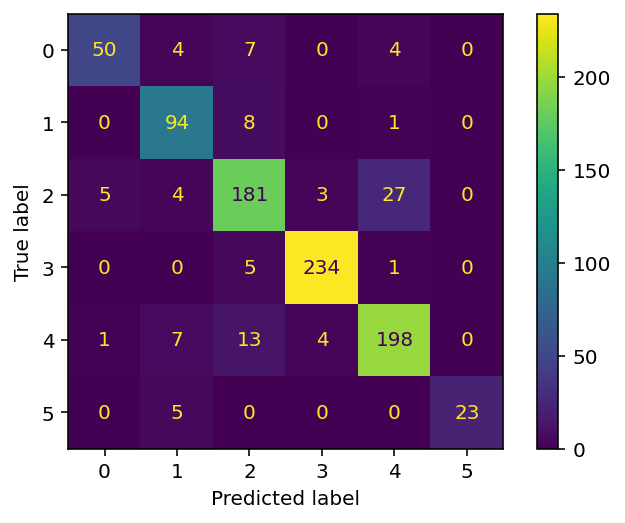

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(targets, pred)


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

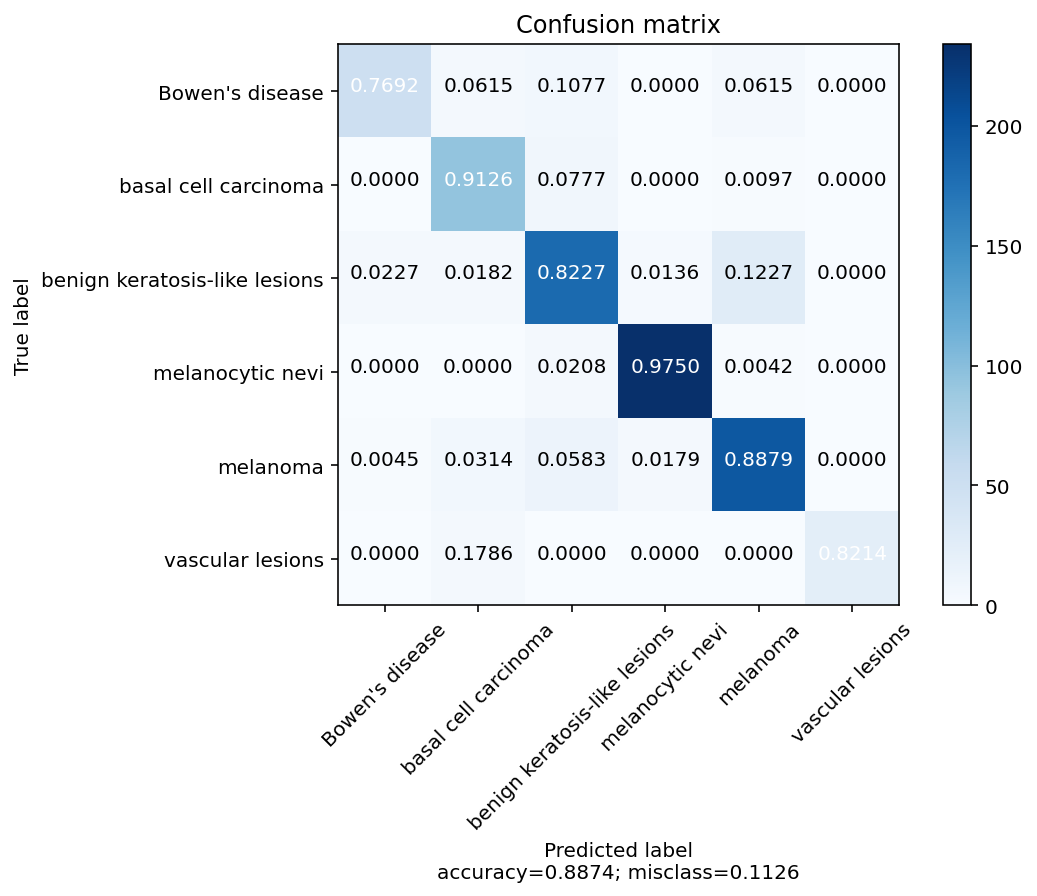

In [ ]:
plot_confusion_matrix(confusion_matrix(targets, pred),testset.classes)

In [ ]:
with open(os.path.join("/content/","labelmap.txt"), "w") as f:
  for i in testset.classes:
    if (len(testset.classes)-1)==testset.classes.index(i):
      f.write(i)
    else:
      f.write(i+'\n')

In [ ]:
'''
for f in tqdm(list(files)):
  pil_to_tensor = transforms.ToTensor()(train_features).unsqueeze_(0)
  #print(f"Feature batch shape: {pil_to_tensor.size()}")
  #print(f"Labels batch shape: {train_labels.size()}")
  img=F.interpolate(pil_to_tensor, size=224)
  #img=torch.reshape(pil_to_tensor, (1,3, 224,224))
  #print(f"Feature batch shape: {img.size()}")
  label = train_labels.item()
  real_Targets.append(label)
  #print(label)

  output=model(img.cpu()).numpy()
  pred_Targets.append(np.argmax(output))

print(real_Targets)
print(pred_Targets)

for f in list(files)[:10]:  # first 10 images
    classify(model, size=450, file=f)
    '''

In [ ]:
!python val.py --weights {best} --data dataset.yaml --img {imgSize} 

In [ ]:
testset.classes

In [ ]:
import torch
from torch.utils.mobile_optimizer import optimize_for_mobile
model = torch.load(best, map_location=torch.device(device))['model'].float()
model.eval()
example = torch.rand(1, 3, imgSize, imgSize)
traced_script_module = torch.jit.trace(model, example.to(device))
optimized_traced_model = optimize_for_mobile(traced_script_module)
optimized_traced_model._save_for_lite_interpreter("model.ptl")

In [ ]:
shutil.copy(os.path.join(os.getcwd(),'model.ptl'),'/content/drive/MyDrive/workspace/yolo_skin_v88_yolov5x/skin-cancer-mnist-ham10000/weights/model.torchscript' )

In [ ]:
!python export.py --weights {best} --include torchscript --imgsz 512 512 --optimize

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/workspace/yolo_skin_v88_yolov5x/skin-cancer-mnist-ham10000/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=True, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v6.1-270-g152d964 torch 1.11.0+cu113 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/thop/vision/basic_hooks.py:92: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  kernel = torch.DoubleTensor([*(x[0].sh

In [ ]:

# Inference
import torch
from classifier import *
from sklearn.metrics import confusion_matrix
from sklearn import metrics
resize = torch.nn.Upsample(size=(imgSize, imgSize), mode='bilinear', align_corners=False)  # image resize
device = select_device('cpu', )

model = torch.jit.load("/content/drive/MyDrive/workspace/yolo_skin_v88_yolov5x/skin-cancer-mnist-ham10000/weights/model.torchscript", map_location=torch.device(device))
# Transforms
trainform = T.Compose([
    T.RandomGrayscale(p=0.01),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomAffine(degrees=1, translate=(.2, .2), scale=(1 / 1.5, 1.5), shear=(-1, 1, -1, 1), fill=(114, 114, 114)),
    # T.Resize([imgsz, imgsz]),  # very slow
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))
    ])  # PILImage from [0, 1] to [-1, 1]
testform = T.Compose(trainform.transforms[-2:])

#files = Path("").glob('content/datasets/skin/test/*/*.jpg')  # images from dir
testset = torchvision.datasets.ImageFolder(root='/content/datasets/skin/test', transform=testform)
testloader = torch.utils.data.DataLoader(testset, shuffle=True)
names = testset.classes
print(list(names))


def test(model, dataloader, names):
    model.eval()
    pred, targets, loss = [], [], 0
    print("Reading images")
    inputData=list(dataloader)
    with torch.no_grad():
        for images, labels in tqdm(inputData):
            images, labels = resize(images.to(device)), labels.to(device)
            y = model(images)
            pred.append(torch.max(y, 1)[1])
            targets.append(labels)


    pred, targets = torch.cat(pred), torch.cat(targets)
    correct = (targets == pred).float()

    accuracy = correct.mean().item()

    print(f"{'class':30s}{'number':10s}{'accuracy':10s}")
    print(f"{'all':30s}{correct.shape[0]:10g}{accuracy:10.5g}")
    for i, c in enumerate(names):
        t = correct[targets == i]
        print(f"{c:30s}{t.shape[0]:10g}{t.mean().item():10.5g}")

    return (accuracy,targets.cpu(),pred.cpu())
acc,targets,pred=test(model,testloader,testset.classes)


In [ ]:
learn.save('myModel2', with_opt=False)
learn.export()




In [ ]:
shutil.copy('/content/models/myModel2.pth','/content/drive/MyDrive/workspace/images_skin/myModel2.pth' )

In [ ]:
shutil.copy('/content/export.pkl','/content/drive/MyDrive/workspace/images_skin/export.pkl' )